In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
%matplotlib inline

In [2]:
datasets_path = os.path.join('../data')
rating_file_path = os.path.join(datasets_path, 'rating.csv');
anime_file_path = os.path.join(datasets_path, 'anime.csv');

In [7]:
ratingDF = pd.read_csv(rating_file_path)

In [8]:
animeDF  = pd.read_csv(anime_file_path)

## Computational efficiency strategy
- Ngày nay nhiều người không muốn đưa ra xếp hạng vì bất kỳ lý do gì, có thể vì họ lười biếng (like me)
- Mặc dù chúng ta có thể bao gồm tất cả xếp hạng (với xếp hạng NULL), nhưng chúng ta ở đây chỉ sử dụng những xếp hạng từ 6 đén 10 để tính toán hiệu quả 
    + -1 có nghĩa là người dùng đã xem nó nhưng không chỉ định xếp hạng, vì vậy chúng tôi quyết định xóa phần này, bao gồm 1,2,3,4,5

In [11]:
### step 1 - filter only rating from 6 to 10
mask = (ratingDF['rating'] == -1) | (ratingDF['rating'] == 1) | (ratingDF['rating'] == 2) | (ratingDF['rating'] == 3) | (ratingDF['rating'] == 4) | (ratingDF['rating'] == 5)

ratingDF = ratingDF.loc[~mask]

In [16]:
### step 2 - changed rating value from 6 - 10, to 1 - 5

def change_rating(rating):
    if rating == 6:
        return 1
    elif rating == 7:
        return 2
    elif rating == 8:
        return 3
    elif rating == 9:
        return 4
    elif rating == 10:
        return 5
    
ratingDF['rating'] = ratingDF['rating'].apply(change_rating)

C:\Users\aqwer\AppData\Local\Temp\ipykernel_3328\3514895389.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratingDF['rating'] = ratingDF['rating'].apply(change_rating)


In [17]:
ratingDF

,user_id,anime_id,rating
47,1,8074,None
81,1,11617,None
83,1,11757,None
101,1,15451,None
153,2,11771,None
...,...,...,...
7813732,73515,16512,None
7813733,73515,17187,None
7813734,73515,22145,None
7813735,73516,790,None


In [7]:
animeDF

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


## Data Cleaning
- Đầu tiên, chúng ta sẽ dễ xây dựng một hệ thống gợi ý nếu dữ liệu không có giá trị NULL
- Vì vậy chúng ta sẽ loại bỏ các giá trị NULL

In [8]:
animeDF.isna().sum()  # checking missing values

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
animeDF.dropna(inplace=True)

In [13]:
# Perhaps anime name uses japanese or special character so the dataframe couldn't read that
# I just cleaned some error for better names for recommendation

def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

animeDF['name'] = animeDF['name'].apply(text_cleaning)

In [15]:
animeDF.isna().sum() 

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [16]:
ratingDF.shape

(5868892, 3)

In [17]:
ratingDF.isnull().sum() # check if any null values in data

user_id     0
anime_id    0
rating      0
dtype: int64

In [18]:
ratingDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5868892 entries, 47 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 179.1 MB


In [19]:
ratingDF.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,5868892.0,36770.791086,21023.616360,1.0,19001.0,36829.0,54898.0,73516.0
anime_id,5868892.0,8925.288071,8888.384082,1.0,1240.0,6287.0,14189.0,34475.0
rating,5868892.0,3.087698,1.235471,1.0,2.0,3.0,4.0,5.0


<AxesSubplot: xlabel='rating', ylabel='count'>

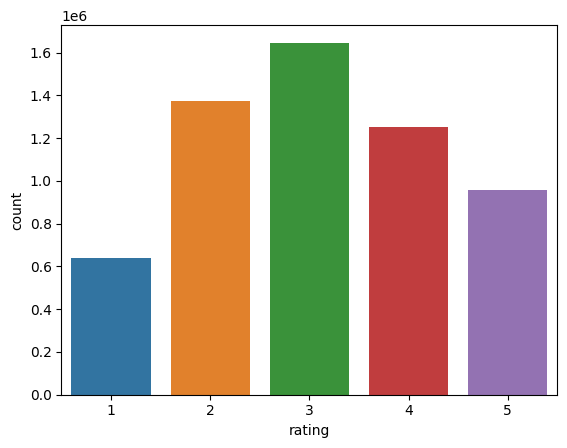

In [20]:
import seaborn as sns
sns.countplot(x='rating',data=ratingDF) #count number of every rating graphically

In [21]:
#create a dataframe with average rating in one column
rating= pd.DataFrame(ratingDF.groupby('user_id')['rating'].mean().sort_values(ascending=False))

In [22]:
#create another column with number of rating given to that product
rating['number of rating'] = pd.DataFrame(ratingDF.groupby('user_id')['rating'].count().sort_values(ascending=False))
rating.sort_values('number of rating',ascending=False)

,rating,number of rating
user_id,,
42635,1.769606,2869
57620,3.279870,2469
59643,2.276354,2381
53698,2.122885,2246
51693,1.903110,2219
...,...,...
9917,5.000000,1
10027,3.000000,1
1134,3.000000,1


In [23]:
ratingDF.groupby('rating')['user_id'].count() #How many user give each rating

rating
1     637775
2    1375287
3    1646019
4    1254096
5     955715
Name: user_id, dtype: int64

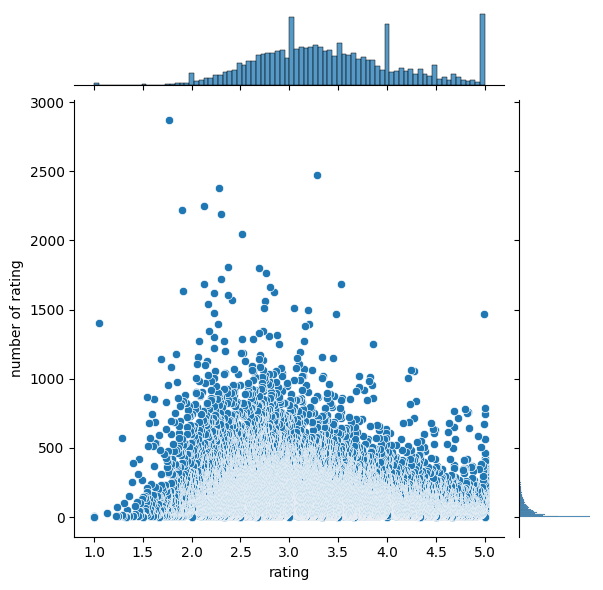

In [31]:
#This graph doesn't add much insight but we can figure out that most of the 5 rating given by very few users. 
sns.jointplot(x='rating',y='number of rating',data=rating)

## What genres are in the anime dataset?

In [27]:
from collections import defaultdict

all_genres = defaultdict(int)

for genres in animeDF['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1

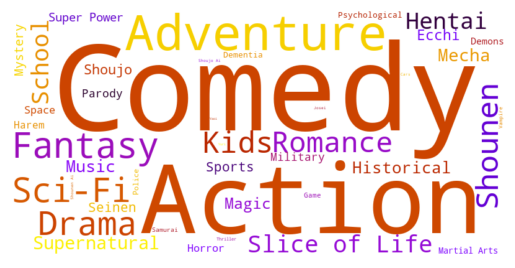

In [28]:
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)

plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

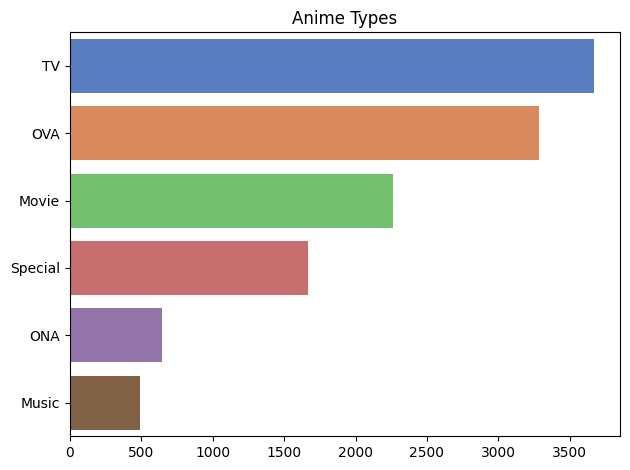

In [30]:
type_count = animeDF['type'].value_counts()

sns.barplot(x=type_count.values,
            y=type_count.index,
            palette='muted').set_title('Anime Types')

plt.tight_layout()
plt.show()

# Merge anime.csv and rating.csv -> metadata 

In [32]:
anime_ratingDF = animeDF.merge(ratingDF, on='anime_id') # joining the two dataframes

In [33]:
anime_ratingDF

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,5
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,5
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,5
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,5
...,...,...,...,...,...,...,...,...,...
5868854,17833,Pink no Curtain,"Hentai, Slice of Life",OVA,1,3.61,138,65836,2
5868855,9352,Tenshi no Habataki Jun,Hentai,OVA,1,4.33,201,53698,1
5868856,9352,Tenshi no Habataki Jun,Hentai,OVA,1,4.33,201,60365,2
5868857,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,20171,2


In [34]:
anime_ratingDF.isna().sum()  # checking missing values


anime_id    0
name        0
genre       0
type        0
episodes    0
rating_x    0
members     0
user_id     0
rating_y    0
dtype: int64

In [37]:
user_rating_count_df = pd.DataFrame(anime_ratingDF.groupby('name').count()['user_id']).rename(columns={'user_id':'total_reviews'})  # making a dataframe of anime's name along with number of reviewrs

In [38]:
user_rating_count_df # checking the above created dataframe

,total_reviews
name,
0,5
001,3
009 Re:Cyborg,190
009-1,188
009-1: RandB,76
...,...
xxxHOLiC Kei,2755
xxxHOLiC Movie: Manatsu no Yoru no Yume,1846
xxxHOLiC Rou,1170


In [39]:
anime_merged_df = animeDF.merge(user_rating_count_df, on='name') # merging the above created dataframe with the master dataframe

In [40]:
anime_merged_df  # checking the master dataframe

,anime_id,name,genre,type,episodes,rating,members,total_reviews
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,1955
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,21400
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,1182
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,17049
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,7331
...,...,...,...,...,...,...,...,...
9192,12397,Original Video Romance Animation,"Comedy, Hentai",OVA,2,4.66,176,1
9193,17833,Pink no Curtain,"Hentai, Slice of Life",OVA,1,3.61,138,1
9194,9352,Tenshi no Habataki Jun,Hentai,OVA,1,4.33,201,2
9195,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,1


In [41]:
animeDF.groupby('name').mean().sort_values('members',ascending=False).head(10)['members'] # checking the member base per anime

C:\Users\vohoa\AppData\Local\Temp\ipykernel_149972\273164214.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  animeDF.groupby('name').mean().sort_values('members',ascending=False).head(10)['members'] # checking the member base per anime


name
Death Note                          1013917.0
Shingeki no Kyojin                   896229.0
Sword Art Online                     893100.0
Fullmetal Alchemist: Brotherhood     793665.0
Angel Beats!                         717796.0
Code Geass: Hangyaku no Lelouch      715151.0
Naruto                               683297.0
Steins;Gate                          673572.0
Mirai Nikki (TV)                     657190.0
Toradora!                            633817.0
Name: members, dtype: float64

C:\Users\vohoa\AppData\Local\Temp\ipykernel_149972\3909009997.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  animeDF.groupby('name').mean().sort_values('members',ascending=False).head(10)['members'].plot(kind='bar',figsize=(12,6)) # plotting top 10 animes with highest member base


Text(0.5, 1.0, 'Member base per anime')

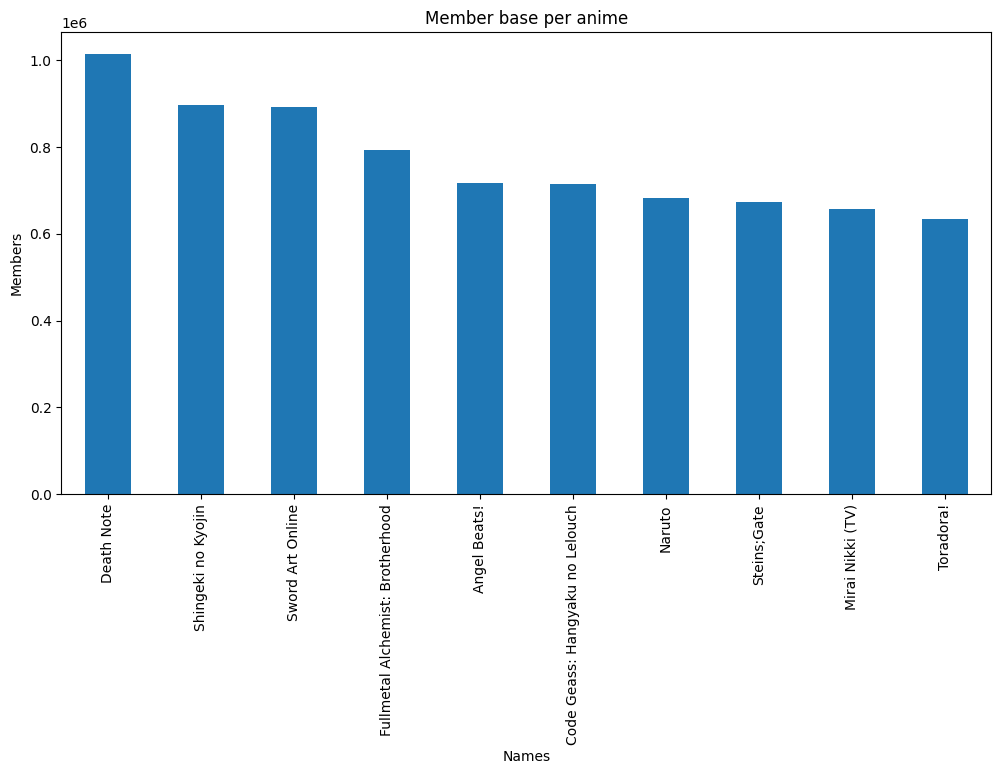

In [42]:
animeDF.groupby('name').mean().sort_values('members',ascending=False).head(10)['members'].plot(kind='bar',figsize=(12,6)) # plotting top 10 animes with highest member base
plt.xlabel('Names')
plt.ylabel('Members')
plt.title('Member base per anime')

C:\Users\vohoa\AppData\Local\Temp\ipykernel_149972\3127817861.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anime_merged_df.groupby('name').mean().sort_values('total_reviews',ascending=False).head(10)['total_reviews'].plot(kind='bar',figsize=(12,6)) # plotting top 10 animes with highest reviews


Text(0.5, 1.0, 'Total Review Counts per Anime')

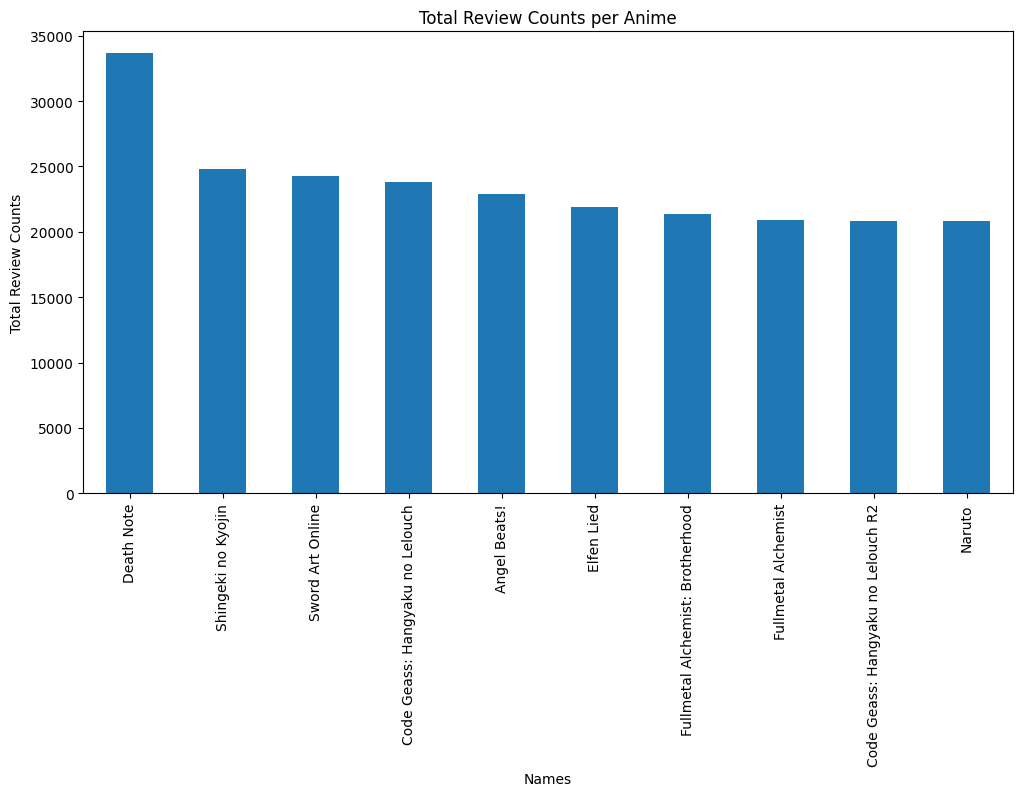

In [43]:
anime_merged_df.groupby('name').mean().sort_values('total_reviews',ascending=False).head(10)['total_reviews'].plot(kind='bar',figsize=(12,6)) # plotting top 10 animes with highest reviews
plt.xlabel('Names')
plt.ylabel('Total Review Counts')
plt.title('Total Review Counts per Anime')

In [ ]:
ratingDF.to_csv('rating_change.csv', index=False)